In [34]:
# As a car salesman, develop a model to predict the total dollar amount that customers are willing to pay given attributes:
# Predict: Car Purchase Amount

In [35]:

# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [36]:
# Import dataset:
train_df = pd.read_csv("C:/Users/saige/OneDrive/Desktop/Coding Projects/train.csv")
test_df = pd.read_csv("C:/Users/saige/OneDrive/Desktop/Coding Projects/test.csv")
# print(df.head(5))
# print(df.tail(5))
train_df = train_df.drop(columns=["week_id"])
test_df = test_df.drop(columns=["week_id"])
train_df["date"] = pd.to_datetime(train_df["date"], dayfirst=True)
train_df["month"] = train_df["date"].dt.month
train_df["dayofweek"] = train_df["date"].dt.dayofweek
train_df = train_df.drop(columns=["date"])

test_df["date"] = pd.to_datetime(test_df["date"], dayfirst=True)
test_df["month"] = test_df["date"].dt.month
test_df["dayofweek"] = test_df["date"].dt.dayofweek
test_df = test_df.drop(columns=["date"])



c:\Users\saige\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


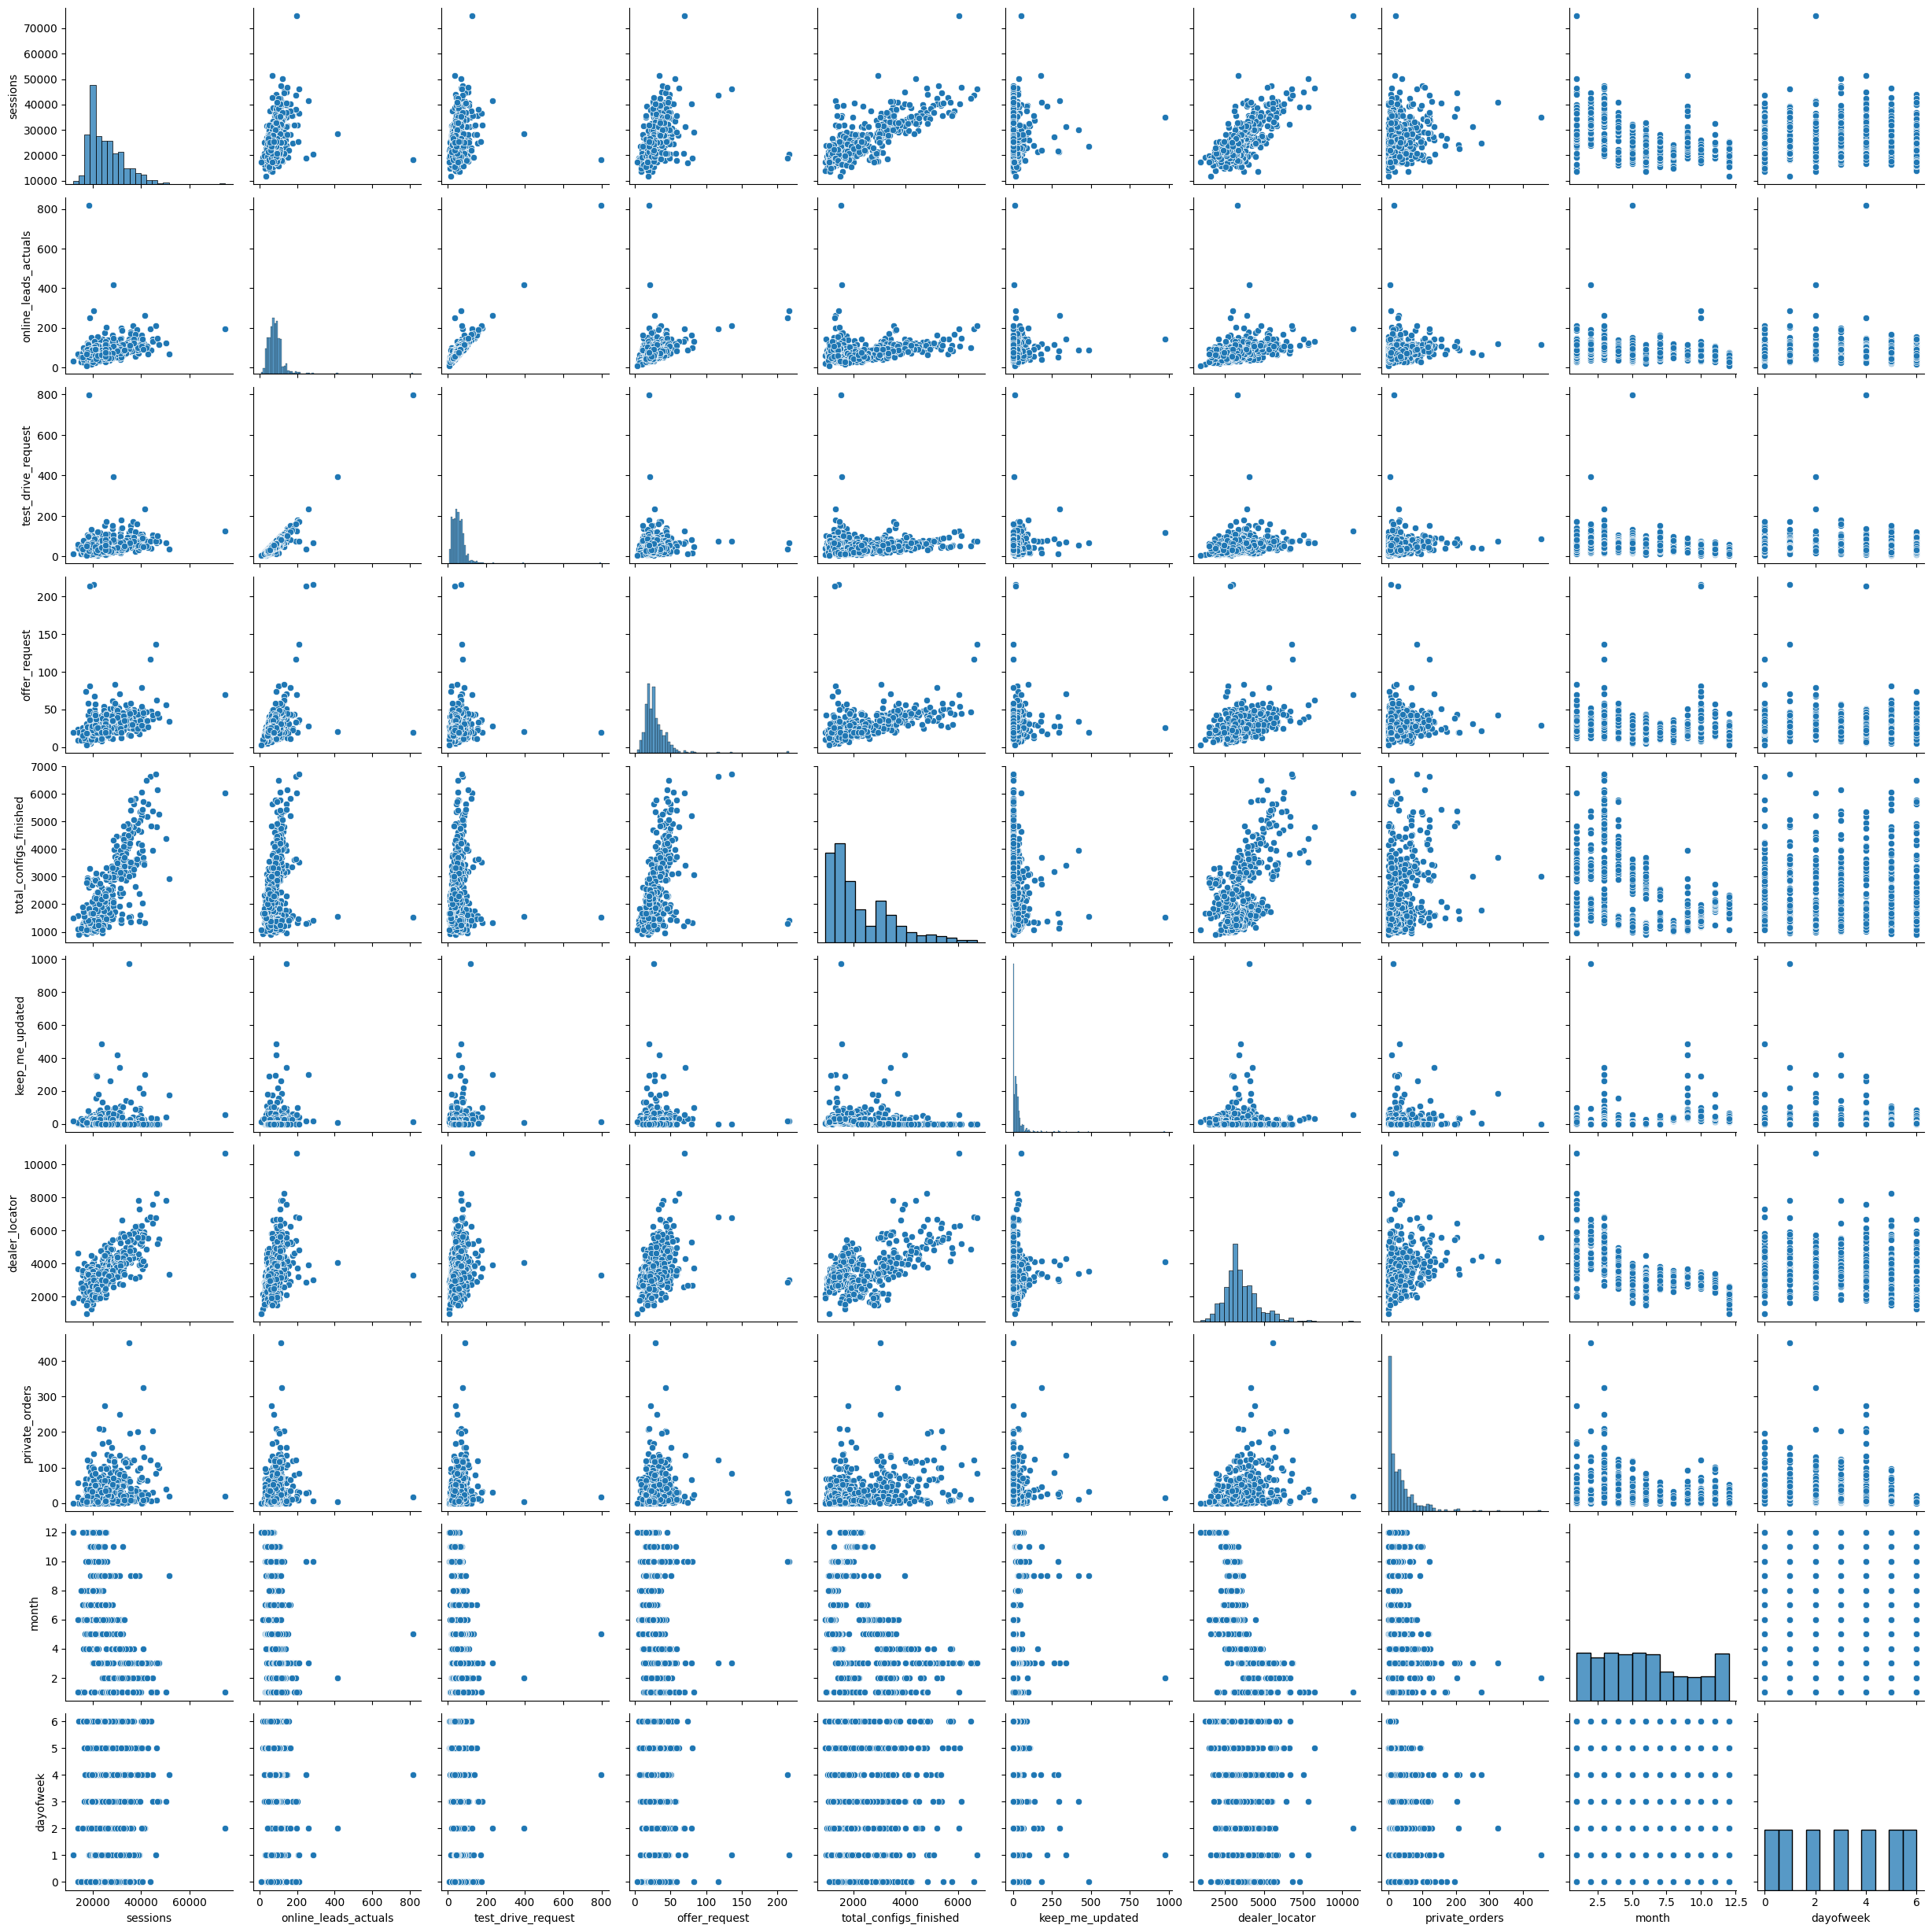

In [37]:

# Visualise df:
sns.pairplot(train_df)

In [38]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())

Train shape: (553, 10)
Test shape: (55, 9)
   sessions  online_leads_actuals  test_drive_request  offer_request  \
0     15038                    29                  12             17   
1     19200                    34                  20             14   
2     28097                    68                  56             12   
3     24711                    69                  39             30   
4     27025                    90                  53             37   

   total_configs_finished  keep_me_updated  dealer_locator  private_orders  \
0                     989                0            2457               0   
1                    1261                2            3457               0   
2                    1878                5            4859              27   
3                    1648                2            4825              16   
4                    1939                2            5219               6   

   month  dayofweek  
0      1          6  
1      1   

In [39]:
# Convert Categorical Variables to numbers:
label_encoders = {}
for col in train_df.select_dtypes(include=['object']).columns:
    label = LabelEncoder()
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    label.fit(combined)
    
    train_df[col] = label.transform(train_df[col])
    test_df[col] = label.transform(test_df[col])
    
    label_encoders[col] = label


In [40]:
# Step 4: Define features and target
X = train_df.drop("private_orders", axis=1)   # replace with actual target column
y = train_df["private_orders"]


In [41]:
# Step 5: Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Step 7: Validate
y_pred = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))
print("R²:", r2_score(y_val, y_pred))

MAE: 27.36906304173027
RMSE: 42.0353086438467
R²: 0.019391525555015776


In [44]:
# Step 8: Predict on test data
test_predictions = model.predict(test_df)

print("Test Predictions:", test_predictions[:10])

Test Predictions: [11.42642595 55.76666153 57.00264521 41.62412484 37.86187148 29.26101002
 22.66986383 16.68456746 59.94358274 53.79373699]


In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))
print("R²:", r2_score(y_val, y_pred))


MAE: 25.18218572114847
RMSE: 37.325218391208885
R²: 0.2268355519271078
